In [27]:
import pandas as pd

df_shai_exuviae=pd.read_csv('/Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/fifty_one/measurements/data/Results-shai-exuviae.csv')
df_analysis=pd.read_csv('/Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/fifty_one/measurements/data/length_analysis_new_split.csv')


# Remove 'colored_' prefix from image_name column
df_analysis['image_name'] = df_analysis['image_name'].str.replace('colored_', '')





In [28]:
df_shai_exuviae['Label'] = df_shai_exuviae['Label'].str.replace('Shai - exuviae:', '')

df_shai_exuviae

,,Label,Area,Mean,Min,Max,BX,BY,Width,Height,Angle,Length
0,1,undistorted_GX010191_5_190,1030,131.196,29.609,166.129,3660,36,41,1029,-87.772,1028.778
1,2,undistorted_GX010191_8_309,791,156.202,55.333,175.122,2456,1376,733,297,22.017,789.582
2,3,undistorted_GX010191_8_309,914,136.620,84.361,170.768,3860,1736,157,901,-80.166,913.420
3,4,undistorted_GX010191_10_370,697,127.490,40.000,189.921,3092,1716,245,653,69.482,696.161
4,5,undistorted_GX010191_10_370,940,154.028,81.667,180.810,4084,1360,837,429,-27.111,939.191
...,...,...,...,...,...,...,...,...,...,...,...,...
80,81,undistorted_GX010194_26_373,1218,150.946,81.667,179.000,1072,1548,1053,613,30.189,1217.065
81,82,undistorted_GX010194_39_513,1309,156.869,47.333,179.686,2436,1320,33,1309,-91.401,1308.391
82,83,undistorted_GX010194_60_836,1735,134.509,47.373,170.459,2208,2544,1733,77,177.487,1733.667
83,84,undistorted_GX010194_60_836,1380,156.280,64.333,181.049,2608,52,561,1261,66.038,1378.840


In [29]:
# Create a merged dataframe by matching Label with image_name
merged_df = pd.merge(
    df_shai_exuviae,
    df_analysis,
    left_on='Label',
    right_on='image_name',
    how='inner'
)

# Calculate the absolute difference between Length and pixels_total_length
merged_df['length_diff'] = abs(merged_df['Length'] - merged_df['pixels_total_length'])

# Filter for rows where the lengths are close (e.g. within 10% difference)
threshold = 0.2# 10% threshold
close_matches = merged_df[merged_df['length_diff'] / merged_df['Length'] < threshold]

# Sort by length difference to see best matches first
close_matches = close_matches.sort_values('length_diff')

# Display results
print(f"Found {len(close_matches)} matches where lengths are within {threshold*100}% difference")
display(close_matches)


Found 70 matches where lengths are within 20.0% difference


,,Label,Area,Mean,Min,Max,BX,BY,Width,Height,...,Length,image_name,lobster_size,total_length,carapace_length,eye_x,eye_y,pixels_total_length,pixels_carapace_length,length_diff
35,31,undistorted_GX010191_37_1242,720,148.253,98.659,170.629,2764,948,221,685,...,718.510,undistorted_GX010191_37_1242,small,160.3,39.7,2927.6,1243.5,719.0,178.1,0.490
17,19,undistorted_GX010191_32_305,791,147.524,87.960,176.063,2516,1328,741,277,...,789.795,undistorted_GX010191_32_305,big,174.5,41.7,2897.1,1454.2,786.3,187.9,3.495
62,50,undistorted_GX010191_100_1250,734,145.590,35.000,185.270,2776,1088,137,721,...,732.732,undistorted_GX010191_100_1250,small,164.7,43.8,2853.8,1416.3,739.4,196.5,6.668
57,48,undistorted_GX010191_94_1132,823,153.479,28.338,180.844,3052,368,777,273,...,822.289,undistorted_GX010191_94_1132,big,183.1,39.8,3728.6,1885.2,832.0,181.0,9.711
29,27,undistorted_GX010191_35_1167,771,154.688,47.898,184.515,2844,644,761,125,...,770.049,undistorted_GX010191_35_1167,big,168.7,39.4,3262.8,683.9,759.4,177.2,10.649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,56,undistorted_GX010191_106_1320,966,172.910,70.000,206.571,2560,692,157,953,...,964.697,undistorted_GX010191_106_1320,big,175.9,43.9,2677.7,1177.7,801.8,200.1,162.897
75,60,undistorted_GX010191_114_1383,938,146.498,96.333,164.144,3448,1576,929,129,...,936.786,undistorted_GX010191_114_1383,big,169.6,37.1,4783.2,521.0,772.3,168.8,164.486
28,26,undistorted_GX010191_35_367,927,147.180,59.118,170.229,4092,1392,793,481,...,926.102,undistorted_GX010191_35_367,small,168.2,40.7,3237.0,1978.7,752.7,182.2,173.402
4,5,undistorted_GX010191_10_370,940,154.028,81.667,180.810,4084,1360,837,429,...,939.191,undistorted_GX010191_10_370,small,171.3,42.0,4558.5,1529.4,762.6,186.9,176.591


In [30]:
# Select only the specified columns
selected_columns = ['image_name', 'BX', 'BY', 'Width', 'Height', 'Length', 
                   'lobster_size', 'total_length', 'pixels_total_length', 'length_diff']

new_df = close_matches[selected_columns]

# Display filtered results
display(new_df)


,image_name,BX,BY,Width,Height,Length,lobster_size,total_length,pixels_total_length,length_diff
35,undistorted_GX010191_37_1242,2764,948,221,685,718.510,small,160.3,719.0,0.490
17,undistorted_GX010191_32_305,2516,1328,741,277,789.795,big,174.5,786.3,3.495
62,undistorted_GX010191_100_1250,2776,1088,137,721,732.732,small,164.7,739.4,6.668
57,undistorted_GX010191_94_1132,3052,368,777,273,822.289,big,183.1,832.0,9.711
29,undistorted_GX010191_35_1167,2844,644,761,125,770.049,big,168.7,759.4,10.649
...,...,...,...,...,...,...,...,...,...,...
71,undistorted_GX010191_106_1320,2560,692,157,953,964.697,big,175.9,801.8,162.897
75,undistorted_GX010191_114_1383,3448,1576,929,129,936.786,big,169.6,772.3,164.486
28,undistorted_GX010191_35_367,4092,1392,793,481,926.102,small,168.2,752.7,173.402
4,undistorted_GX010191_10_370,4084,1360,837,429,939.191,small,171.3,762.6,176.591


In [31]:
# Add real length based on size class
new_df['real_length'] = new_df['lobster_size'].map({'small': 145, 'big': 180})

# Calculate absolute difference between real length and total length
new_df['real_length_abs_diff'] = abs(new_df['total_length'] - new_df['real_length'])

# Calculate relative difference as percentage
new_df['real_length_rel_diff'] = (new_df['real_length_abs_diff'] / new_df['real_length']) * 100

display(new_df)


/var/folders/9w/y40_ws0n1_n_hby5lpbrj1_m0000gn/T/ipykernel_12714/2314326851.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9w/y40_ws0n1_n_hby5lpbrj1_m0000gn/T/ipykernel_12714/2314326851.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9w/y40_ws0n1_n_hby5lpbrj1_m0000gn/T/ipykernel_12714/2314326851.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,image_name,BX,BY,Width,Height,Length,lobster_size,total_length,pixels_total_length,length_diff,real_length,real_length_abs_diff,real_length_rel_diff
35,undistorted_GX010191_37_1242,2764,948,221,685,718.510,small,160.3,719.0,0.490,145,15.3,10.551724
17,undistorted_GX010191_32_305,2516,1328,741,277,789.795,big,174.5,786.3,3.495,180,5.5,3.055556
62,undistorted_GX010191_100_1250,2776,1088,137,721,732.732,small,164.7,739.4,6.668,145,19.7,13.586207
57,undistorted_GX010191_94_1132,3052,368,777,273,822.289,big,183.1,832.0,9.711,180,3.1,1.722222
29,undistorted_GX010191_35_1167,2844,644,761,125,770.049,big,168.7,759.4,10.649,180,11.3,6.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,undistorted_GX010191_106_1320,2560,692,157,953,964.697,big,175.9,801.8,162.897,180,4.1,2.277778
75,undistorted_GX010191_114_1383,3448,1576,929,129,936.786,big,169.6,772.3,164.486,180,10.4,5.777778
28,undistorted_GX010191_35_367,4092,1392,793,481,926.102,small,168.2,752.7,173.402,145,23.2,16.000000
4,undistorted_GX010191_10_370,4084,1360,837,429,939.191,small,171.3,762.6,176.591,145,26.3,18.137931


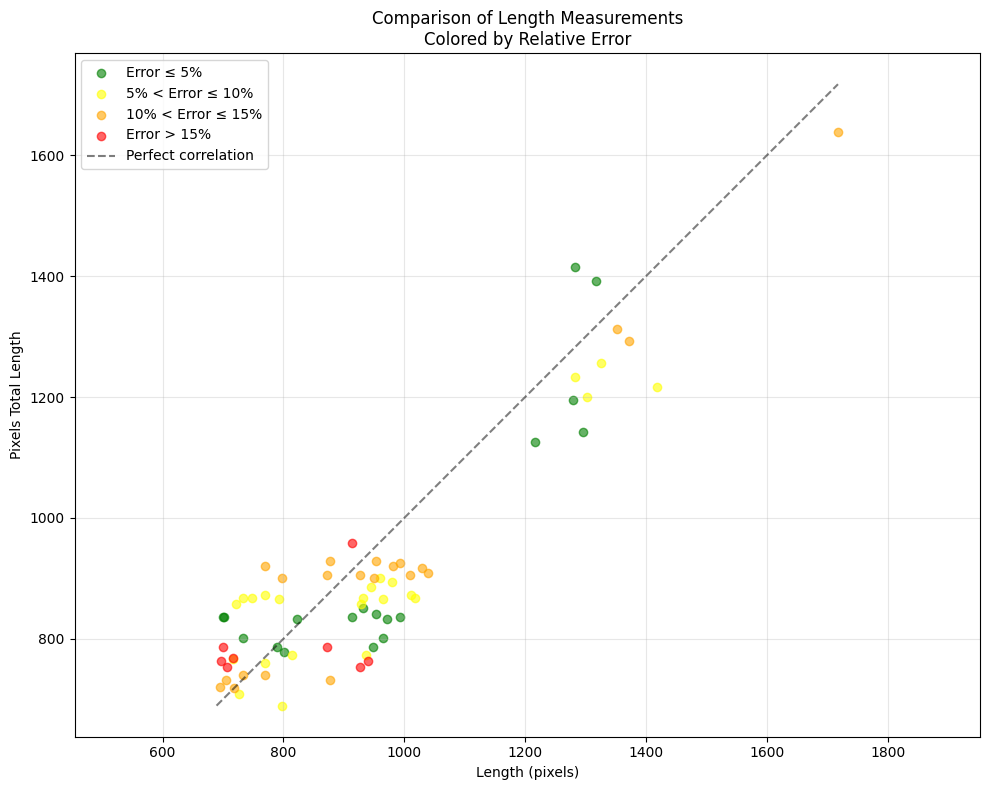

In [32]:
# Create scatter plot comparing Length vs pixels_total_length

import matplotlib.pyplot as plt



plt.figure(figsize=(10, 8))

# Plot points with different colors based on relative error
error_thresholds = [5, 10, 15]
colors = ['green', 'yellow', 'orange', 'red']

for i in range(len(error_thresholds) + 1):
    if i == 0:
        mask = new_df['real_length_rel_diff'] <= error_thresholds[0]
        label = f'Error ≤ {error_thresholds[0]}%'
    elif i == len(error_thresholds):
        mask = new_df['real_length_rel_diff'] > error_thresholds[-1]
        label = f'Error > {error_thresholds[-1]}%'
    else:
        mask = (new_df['real_length_rel_diff'] > error_thresholds[i-1]) & \
               (new_df['real_length_rel_diff'] <= error_thresholds[i])
        label = f'{error_thresholds[i-1]}% < Error ≤ {error_thresholds[i]}%'
    
    plt.scatter(new_df[mask]['Length'], 
               new_df[mask]['pixels_total_length'],
               c=colors[i],
               alpha=0.6,
               label=label)

# Add diagonal line representing perfect correlation
min_val = min(new_df['Length'].min(), new_df['pixels_total_length'].min())
max_val = max(new_df['Length'].max(), new_df['pixels_total_length'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect correlation')

plt.xlabel('Length (pixels)')
plt.ylabel('Pixels Total Length')
plt.title('Comparison of Length Measurements\nColored by Relative Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Make plot square
plt.axis('equal')
plt.tight_layout()
plt.show()


In [33]:
import plotly.express as px
import plotly.graph_objects as go

# Create scatter plot with plotly
fig = go.Figure()

# Plot points with different colors based on relative error
error_thresholds = [5, 10, 15]
colors = ['green', 'yellow', 'orange', 'red']

for i in range(len(error_thresholds) + 1):
    if i == 0:
        mask = new_df['real_length_rel_diff'] <= error_thresholds[0]
        label = f'Error ≤ {error_thresholds[0]}%'
    elif i == len(error_thresholds):
        mask = new_df['real_length_rel_diff'] > error_thresholds[-1]
        label = f'Error > {error_thresholds[-1]}%'
    else:
        mask = (new_df['real_length_rel_diff'] > error_thresholds[i-1]) & \
               (new_df['real_length_rel_diff'] <= error_thresholds[i])
        label = f'{error_thresholds[i-1]}% < Error ≤ {error_thresholds[i]}%'
    
    fig.add_trace(go.Scatter(
        x=new_df[mask]['Length'],
        y=new_df[mask]['pixels_total_length'],
        mode='markers',
        name=label,
        marker=dict(
            color=colors[i],
            size=10,
            opacity=0.6
        )
    ))

# Add diagonal line for perfect correlation
min_val = min(new_df['Length'].min(), new_df['pixels_total_length'].min())
max_val = max(new_df['Length'].max(), new_df['pixels_total_length'].max())
fig.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    name='Perfect correlation',
    line=dict(color='black', dash='dash', width=1),
    opacity=0.5
))

# Update layout
fig.update_layout(
    title='Comparison of Length Measurements<br>Colored by Relative Error',
    xaxis_title='Length (pixels)',
    yaxis_title='Pixels Total Length',
    showlegend=True,
    width=800,
    height=800,
    xaxis=dict(range=[min_val, max_val]),
    yaxis=dict(range=[min_val, max_val]),
    plot_bgcolor='white'
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()
